# Compare the LSST magnitudes I calculate to those from TRILEGAL

Should I use Kurucz atmospheres?

https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/resBasedDoc/kuruczModels.html

https://pysynphot.readthedocs.io/en/latest/spectrum.html

In [31]:
import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from EBLSST import LSSTEBworker, SED
import pandas as pd
import numpy as np
from astropy import units, constants 
from matplotlib import pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Read in a TRILEGAL field*

In [40]:
filename = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGAL/grid/trilegal.grid.id1.0.h5'
df = pd.read_hdf(filename)
#dist = 10.**(df['m-M0'].values/5.) * 10.# *u.parsec

dist = 10.**( (df['m-M0'].values + 5)/5.) #pc
logDist = np.log10(dist/1000.) #log(d [kpc])
logR = 2.*(0.25*df['logL'] - df['logTe'] + 3.762) #taken from my N-body notes to get logT <-- from Jarrod Hurley

df['logR'] = logR
df['logDist'] = logDist

print(df)

        Gc  logAge  [M/H]     m_ini   logL  logTe   logg  m-M0     Av  m2/m1  \
0        1    6.65   0.27   0.51311 -1.374  3.592  4.837   7.2  0.347    0.0   
1        1    6.71  -0.19   0.13318 -1.740  3.509  4.285   8.0  0.458    0.0   
2        1    6.71  -0.09   0.74550 -0.736  3.671  4.676   8.2  0.371    0.0   
3        1    6.87  -0.07   1.62066  0.870  3.896  4.307   9.7  0.568    0.0   
4        1    6.87   0.07   0.74828 -0.767  3.661  4.668   8.8  0.431    0.0   
5        1    6.87   0.27   1.31862  0.403  3.806  4.326  12.8  0.432    0.0   
6        1    7.07   0.23   0.11043 -1.914  3.482  4.269   4.4  0.112    0.0   
7        1    7.15  -0.17   0.78918 -0.596  3.693  4.650   7.6  0.372    0.0   
8        1    7.15  -0.09   0.80570 -0.582  3.693  4.642  10.3  0.457    0.0   
9        1    7.17   0.13  14.01946  4.484  4.395  3.626   9.3  0.483    0.0   
10       1    7.21   0.17   0.22026 -2.181  3.536  5.052   7.1  0.346    0.0   
11       1    7.25   0.01   0.35666 -1.7

*Create an EB in my code*

In [220]:
worker = LSSTEBworker()
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.initialize()

diff = {}
diff['mbol'] = []
diff['Teff'] = []
diff['MH'] = []
diff['Av'] = []
diff['Ldiff'] = []
diff['u'] = []
diff['g'] = []
diff['r'] = []
diff['i'] = []
diff['z'] = []
diff['y'] = []
for i in range(100):
    print(i)
    L1 = 10.**df['logL'][i]
    L2 = 1e-20
    r1 = 10.**df['logR'][i]
    r2 = 1e-20
    dist = 10.**df['logDist'][i]
    Av = df['Av'][i]
    M_H = df['[M/H]'][i]
    
    line = [1., 1., 1., 0., r1, r2, L1, L2, 1., 1., 1., dist, 0., 0., Av, M_H]
    EB = worker.getEB(line, i)

#     print(EB.T1, 10.**df['logTe'][i])
#     print(EB.Mbol, df['mbol'][i] - df['m-M0'][i])

#     print(EB.appMagMean)
#     print(dfmags.iloc[i])
    
    diff['mbol'].append(df['mbol'][i])
    diff['Teff'].append(EB.T1)
    diff['Av'].append(Av)
    diff['MH'].append(M_H)
#     diff['Ldiff'].append(L1 - EB.Ltest)
    diff['u'].append(df['u_mag'][i] - EB.appMagMean['u_'])
    diff['g'].append(df['g_mag'][i] - EB.appMagMean['g_'])
    diff['r'].append(df['r_mag'][i] - EB.appMagMean['r_'])
    diff['i'].append(df['i_mag'][i] - EB.appMagMean['i_'])
    diff['z'].append(df['z_mag'][i] - EB.appMagMean['z_'])
    diff['y'].append(df['Y_mag'][i] - EB.appMagMean['y_'])
    #print(10.**df.iloc[i]['logTe'])
    print(10.**df['logTe'][i],\
          df['u_mag'][i] - EB.appMagMean['u_'],\
          df['g_mag'][i] - EB.appMagMean['g_'],\
          df['r_mag'][i] - EB.appMagMean['r_'],\
          df['i_mag'][i] - EB.appMagMean['i_'],\
          df['z_mag'][i] - EB.appMagMean['z_'],\
          df['Y_mag'][i] - EB.appMagMean['y_'])
#           L1 - EB.Ltest)
#     print(diff)
#     if (i>2):
#         raise


0
3908.4089579240213 0.025338738994481247 0.010312743363325438 0.09044790217098608 0.05511824862909975 0.02817808146331835 0.058463654953571975
1
3228.4941217126348 1.3367746854681073 0.6505120469526453 0.6162826748231147 0.2927849837719343 0.13612450665265285 0.14577260084702104
2
4688.133821452655 -0.03271489457976173 -0.05652117772808296 0.01775469365235871 0.03075911310951618 0.018529049117432805 0.034758738140546086
3
7870.457896950993 -0.05685805166983471 0.006740198077574533 0.03344821155167921 0.04306139537918874 0.02908106440515823 0.002310014472088895
4
4581.418867145335 -0.025562812476714214 -0.05220417811098699 0.025596038595400827 0.03661790580534685 0.022020239232444894 0.03952301061851493
5
6397.348354826482 -0.034661174426624086 -0.02440401999675501 0.02158342879403108 0.034044646697704906 0.02178122498058599 0.0048854432658700375
6
3033.891184194269 1.9975022914781704 1.0286233710428618 0.7865226011468192 0.3789353442204355 0.15937241626415322 0.15494758260429542
7
493

12941.958414499863 0.015263147096908014 0.02015213983489339 0.029887977062868387 0.04136454177739601 0.03599619758048611 -0.021203765563400978
58
3698.281797802663 0.277952943543216 0.05987919867611424 0.10627004983892618 0.07154912225744425 0.04471118236240201 0.08916133618640387
59
3953.666200681279 -0.027862580273275483 -0.03781076761451985 0.045184365667719106 0.04250446989960821 0.025308600383159074 0.052952026459415436
60
7620.790100254115 -0.056602422039748745 0.005979197102028877 0.03199289436380148 0.040433373676684425 0.02808435103245266 0.003434612699830808
61
5984.115950603193 -0.03300205871345696 -0.0388413990242249 0.021625416161734634 0.03837659931308224 0.024647803557797943 0.014076109624671318
62
13458.60354055947 0.014193853341595286 0.010026603699310854 0.024352753402503424 0.038907239634811575 0.031247349570282523 -0.029155767526159337
63
3054.9211132155124 1.9405894136662276 0.8894785468890696 0.594698037885383 0.32133323621382104 0.14110622655698535 0.173409196986

<IPython.core.display.Javascript object>


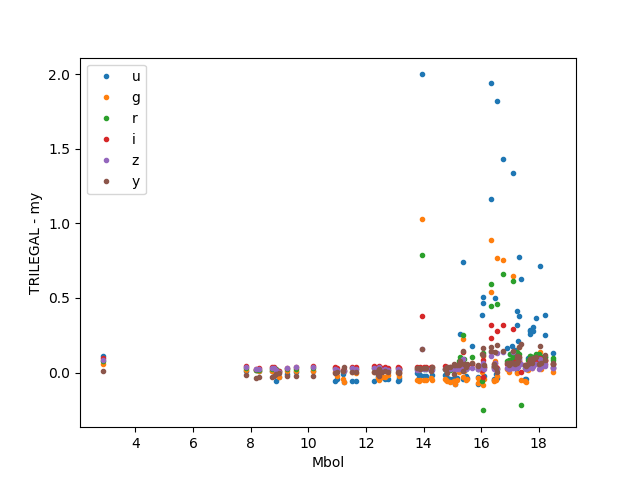

<IPython.core.display.Javascript object>


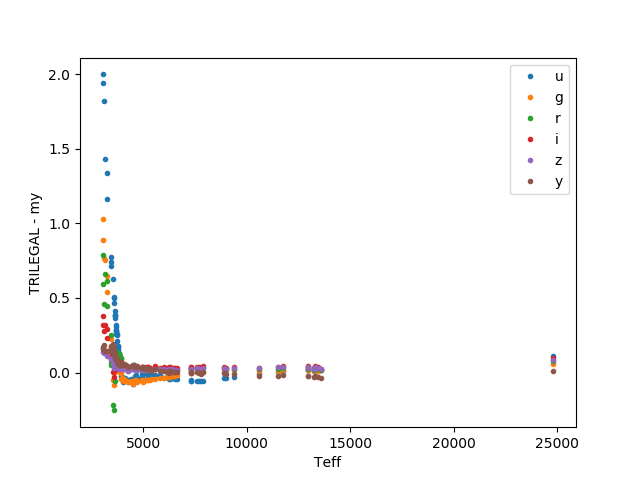

<IPython.core.display.Javascript object>


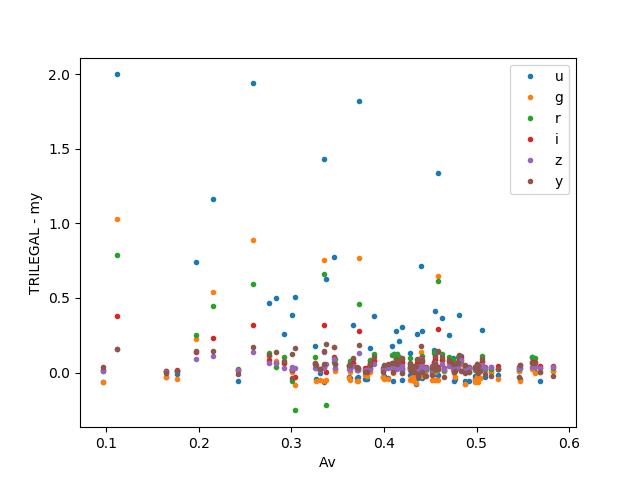

<IPython.core.display.Javascript object>


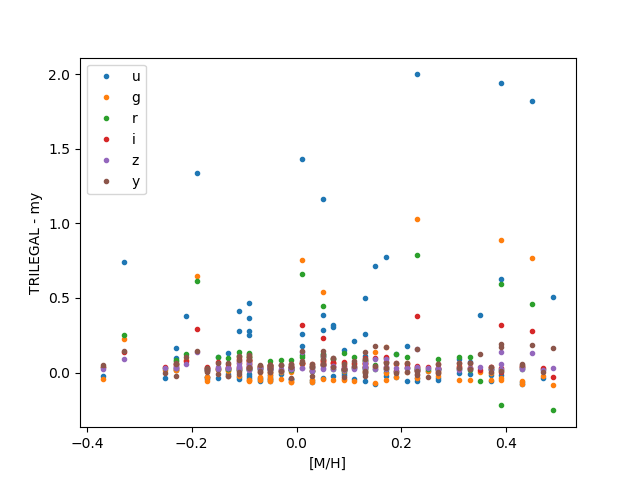

<IPython.core.display.Javascript object>


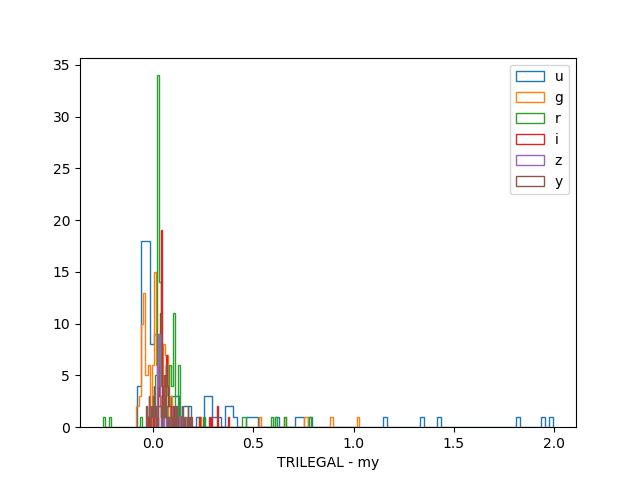

In [221]:
#some plots.
#Note: the deviation at low T is because the Kurucz models only go down to 3500 K.

f, ax = plt.subplots()
ax.plot(diff['mbol'], diff['u'],'.', label='u')
ax.plot(diff['mbol'], diff['g'],'.', label='g')
ax.plot(diff['mbol'], diff['r'],'.', label='r')
ax.plot(diff['mbol'], diff['i'],'.', label='i')
ax.plot(diff['mbol'], diff['z'],'.', label='z')
ax.plot(diff['mbol'], diff['y'],'.', label='y')
ax.set_xlabel('Mbol')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

f, ax = plt.subplots()
ax.plot(diff['Teff'], diff['u'],'.', label='u')
ax.plot(diff['Teff'], diff['g'],'.', label='g')
ax.plot(diff['Teff'], diff['r'],'.', label='r')
ax.plot(diff['Teff'], diff['i'],'.', label='i')
ax.plot(diff['Teff'], diff['z'],'.', label='z')
ax.plot(diff['Teff'], diff['y'],'.', label='y')
ax.set_xlabel('Teff')
ax.set_ylabel('TRILEGAL - my')
ax.legend()


f, ax = plt.subplots()
ax.plot(diff['Av'], diff['u'],'.', label='u')
ax.plot(diff['Av'], diff['g'],'.', label='g')
ax.plot(diff['Av'], diff['r'],'.', label='r')
ax.plot(diff['Av'], diff['i'],'.', label='i')
ax.plot(diff['Av'], diff['z'],'.', label='z')
ax.plot(diff['Av'], diff['y'],'.', label='y')
ax.set_xlabel('Av')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

f, ax = plt.subplots()
ax.plot(diff['MH'], diff['u'],'.', label='u')
ax.plot(diff['MH'], diff['g'],'.', label='g')
ax.plot(diff['MH'], diff['r'],'.', label='r')
ax.plot(diff['MH'], diff['i'],'.', label='i')
ax.plot(diff['MH'], diff['z'],'.', label='z')
ax.plot(diff['MH'], diff['y'],'.', label='y')
ax.set_xlabel('[M/H]')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

f, ax = plt.subplots()
ax.hist(diff['u'],histtype='step', label='u', bins=100)
ax.hist(diff['g'],histtype='step', label='g', bins=100)
ax.hist(diff['r'],histtype='step', label='r', bins=100)
ax.hist(diff['i'],histtype='step', label='i', bins=100)
ax.hist(diff['z'],histtype='step', label='z', bins=100)
ax.hist( diff['y'],histtype='step', label='y', bins=100)
ax.set_xlabel('TRILEGAL - my')
ax.legend()

# f, ax = plt.subplots()
# ax.plot(diff['Teff'], diff['Ldiff'],'.', label='u')
# ax.set_xlabel('Teff')
# ax.set_ylabel('L TRILEGAL - my')
# ax.set_ylim(-2,1)
# ax.legend()

0


<IPython.core.display.Javascript object>


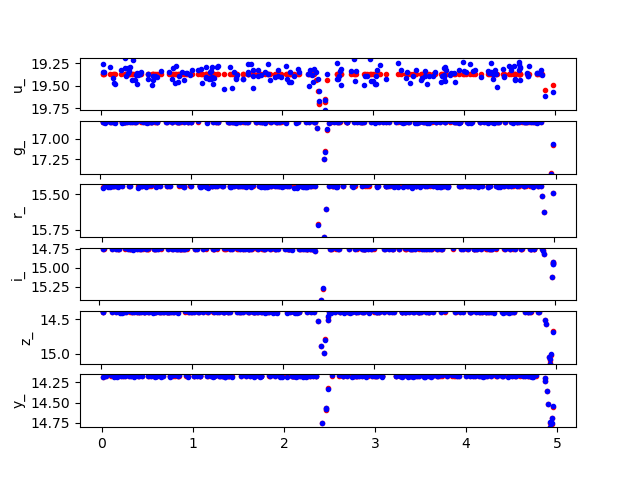

In [223]:
i=0

print(i)
L1 = 10.**df['logL'][i]
L2 = L1
r1 = 10.**df['logR'][i]
r2 = r1
dist = 10.**df['logDist'][i]
Av = df['Av'][i]
line = [1., 1., 1., 0., r1, r2, L1, L2, 1., 1., 1., dist, 0., 0., Av]
EB = worker.getEB(line, i)

f,ax = plt.subplots(6,1)
for i,f in enumerate(worker.filters):
    EB.observe(f)

    ax[i].plot((EB.obsDates[f] % EB.period), EB.appMag[f],'.', color='red')
    ax[i].plot((EB.obsDates[f] % EB.period), EB.appMagObs[f],'.', color='blue')
    ax[i].set_ylim(max(EB.appMagObs[f]), min(EB.appMagObs[f]))
    ax[i].set_ylabel(f)


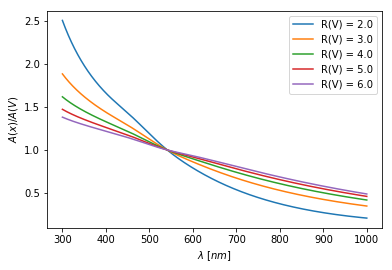

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from dust_extinction.parameter_averages import F04

fig, ax = plt.subplots()

# temp model to get the correct x range
text_model = F04()

# generate the curves and plot them
# x = np.arange(text_model.x_range[0],
#               text_model.x_range[1],0.1)/u.micron

x = np.arange(300,1000, 0.1 )*u.nm

Rvs = ['2.0','3.0','4.0','5.0','6.0']
for cur_Rv in Rvs:
    ext_model = F04(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel('$\lambda$ [$nm$]')
ax.set_ylabel('$A(x)/A(V)$')

ax.legend(loc='best')
plt.show()

In [104]:
#https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/resBasedDoc/kuruczModels.html
#from PyAstronomy import pyasl
#running the command in the next cell for the first time, will download data
# The input is: Teff, logg, and log10(metallicity), but ... this doesn't give fluxes??
# model = pyasl.getKuruczModel(4250, 4.5, 0.0)
# print(model)
#f,ax = plt.subplot()

/Users/ageller/python_scripts/PySynphotData/
angstrom
flam


<IPython.core.display.Javascript object>


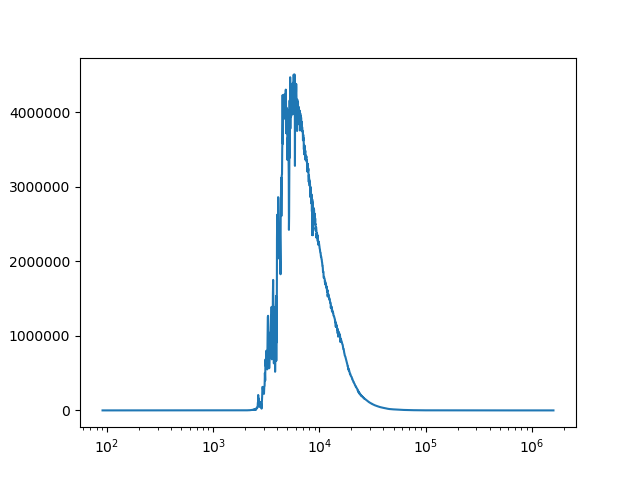

In [156]:
#https://pysynphot.readthedocs.io/en/latest/index.html#pysynphot-installation-setup
#need to download grid of models manually, and set path accordingly
from astropy.io import fits
import pysynphot as pyS

import os
#export PYSYN_CDBS=/my/local/dir/cdbs/
print(os.environ['PYSYN_CDBS'])

#Teff, M/H, logg
sp = pyS.Icat('ck04models', 5000, 0.12, 5.0)
print(sp.waveunits)
print(sp.fluxunits)
f,ax = plt.subplots()
ax.semilogx(sp.wave, sp.flux)#,'.')
#ax.set_xlim(3000, 4000)



In [125]:
print((constants.h * 1*units.Hz).cgs)

6.62607004e-27 erg


In [202]:
#pyS.reddening.print_red_laws()
pyS.Extinction(0.1, 'gal3')(10000)

NotImplementedError: Sorry, gal3 is not yet implemented